In [43]:
from sklearn.mixture import GaussianMixture
import numpy as np
import cv2
import os
import gc
import matplotlib.pyplot as plt

In [27]:

def get_video_patches(dataset_path, num_patches=5):
    # List all the classes (subdirectories) in the dataset
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    # List all video files and their corresponding classes
    all_videos = []
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        video_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        for video_file in video_files:
            all_videos.append((os.path.join(class_path, video_file), class_name))

    # Split the video list into patches
    patch_size = len(all_videos) // num_patches
    patches = [all_videos[i * patch_size:(i + 1) * patch_size] for i in range(num_patches)]
    if len(all_videos) % num_patches != 0:
        patches.append(all_videos[num_patches * patch_size:])

    return patches


def load_video_patch(patch):
    # Initialize the lists for storing videos and labels
    patch_X = []
    patch_y = []

    for video_path, class_name in patch:
        # Read the video using cv2
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video file {video_path}")
            continue

        frames = []
        # Process the video frame by frame
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            # Convert frame to RGB (if needed)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame_rgb)

        # Release the video capture object
        cap.release()

        # Store the frames and the corresponding label
        patch_X.append(frames)
        patch_y.append(class_name)

    return patch_X, patch_y


In [30]:
# Define the path to your dataset
dataset_path = 'dataset/test'

# Get the patches
patches = get_video_patches(dataset_path, num_patches=5)

# Load a specific patch (e.g., the first patch)
X, y = load_video_patch(patches[0])
gc.collect()
# Verifica el número de videos y la forma del primer video como prueba de funcionamiento
print(f"Number of videos in patch: {len(X)}")

Number of videos in patch: 344


In [25]:
np.unique(y)

array(['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling',
       'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball',
       'BasketballDunk', 'BenchPress', 'Biking', 'Billiards',
       'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats', 'Bowling',
       'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke'],
      dtype='<U17')

In [58]:
image = X[0]
histograms = np.zeros((image[0].shape[0],image[0].shape[1],256),dtype=np.uint8)
for frame in image:
        for x in range(frame.shape[0]):
            for y in range(frame.shape[1]):
                histograms[x][y][frame[x][y]] += 1 

In [59]:
histograms[0][0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 49,  0,
        3,  0, 30, 41,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

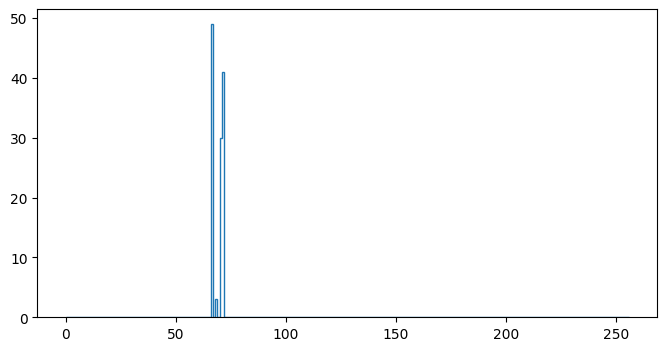

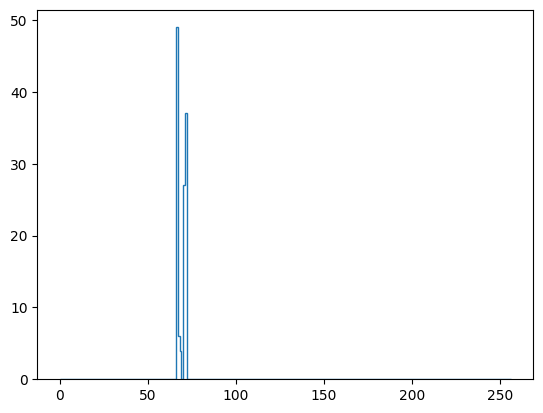

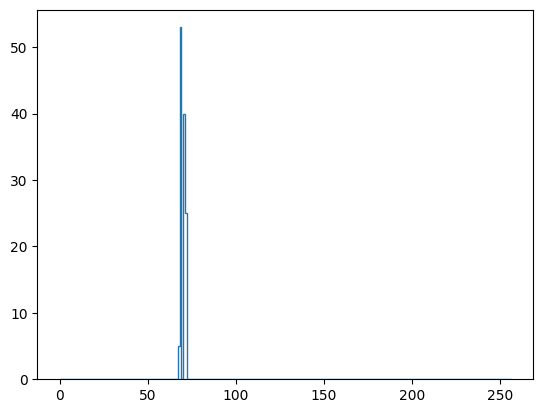

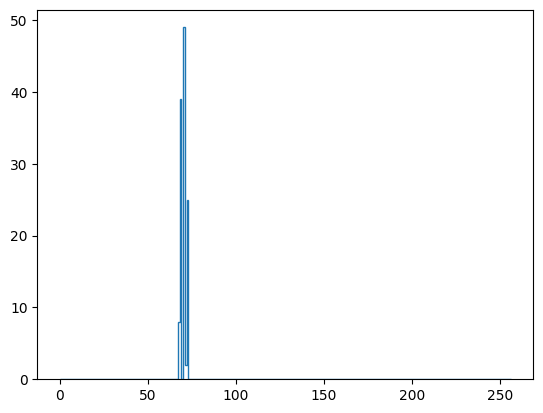

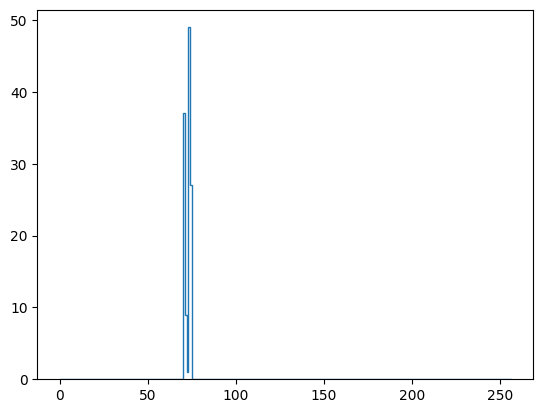

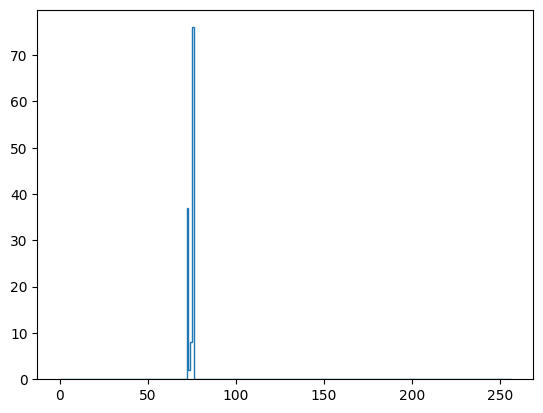

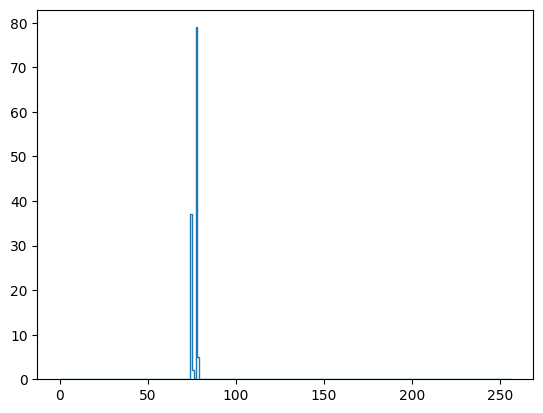

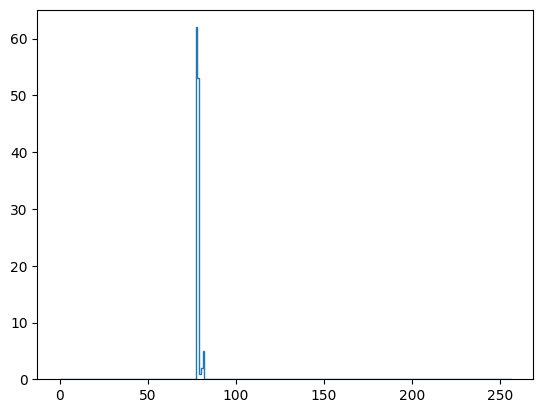

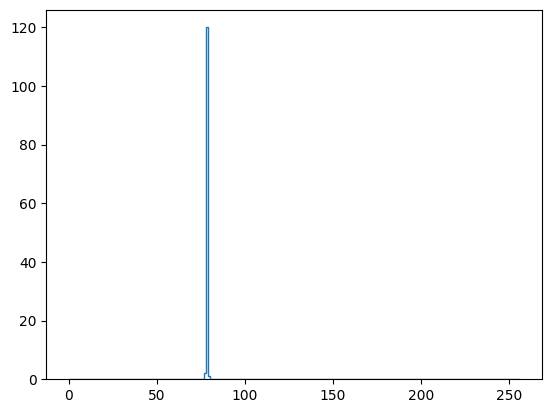

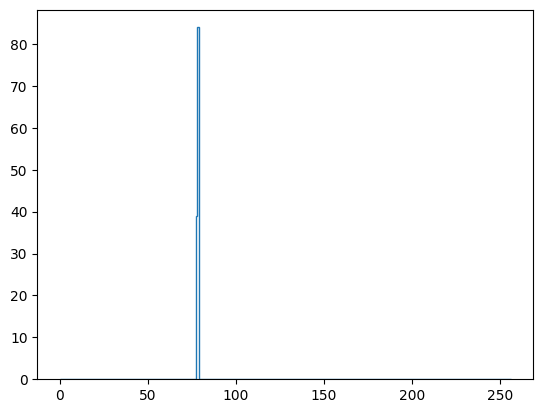

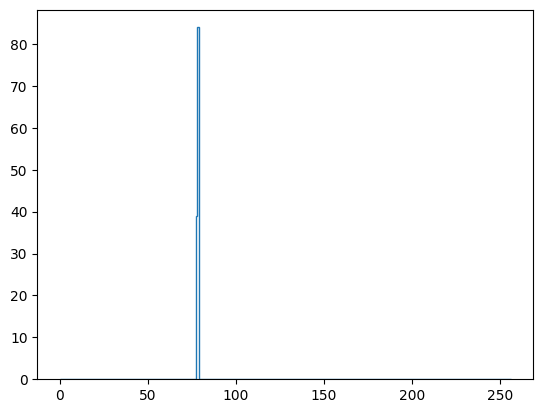

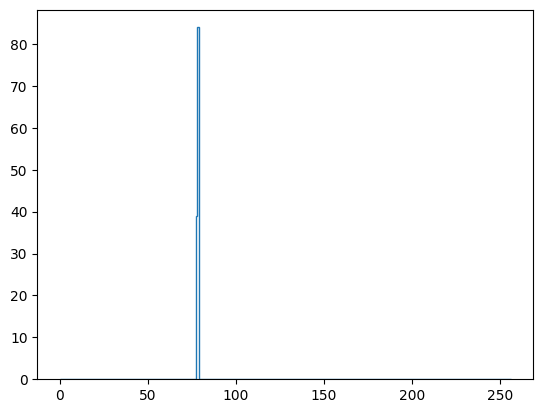

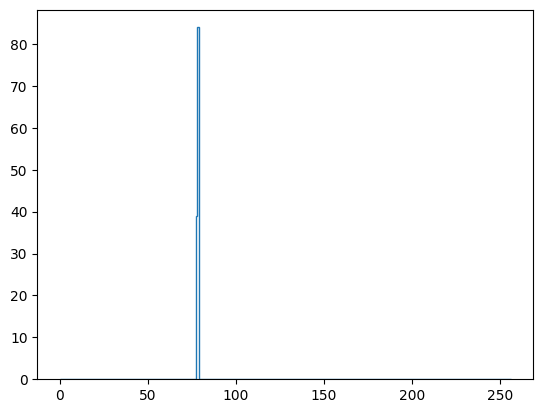

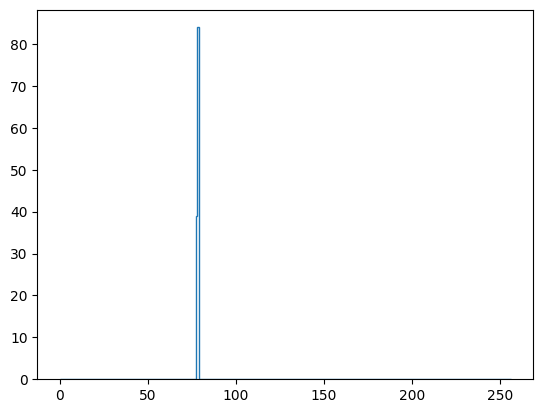

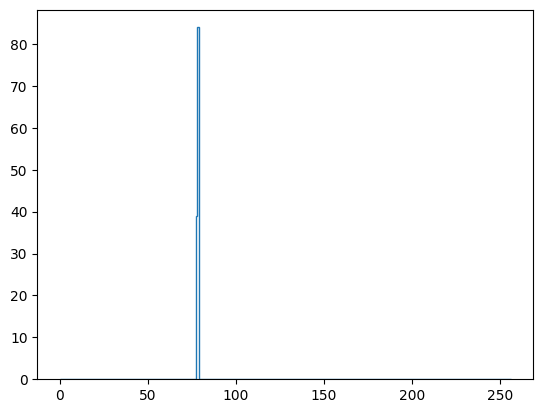

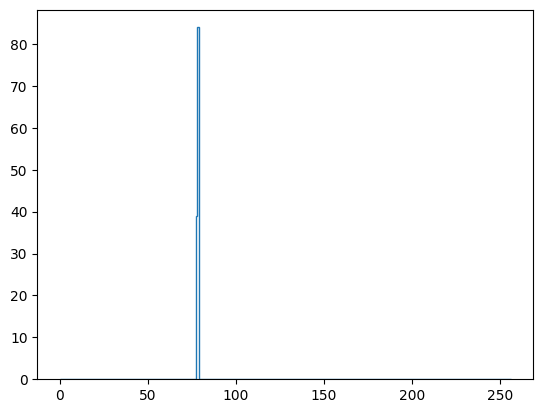

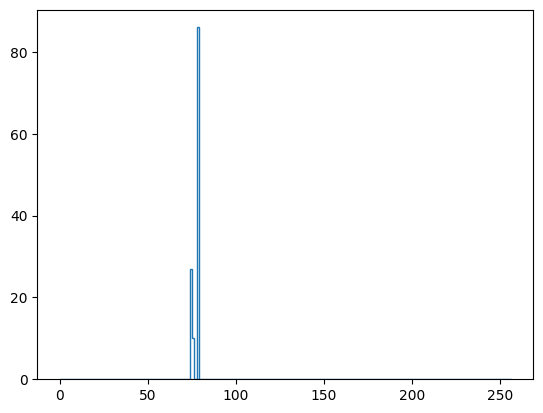

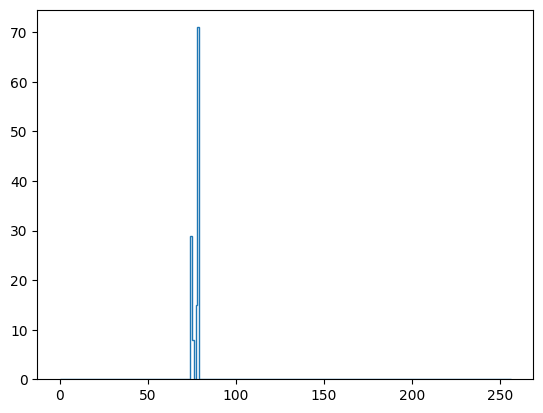

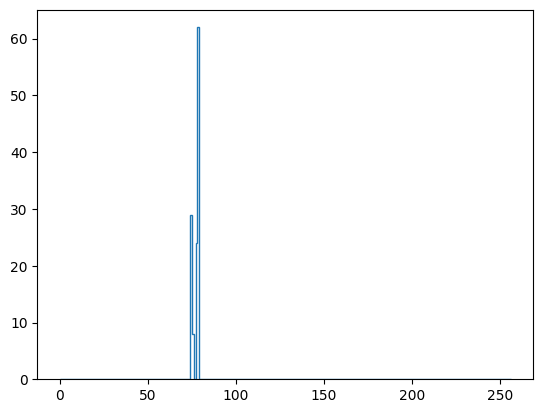

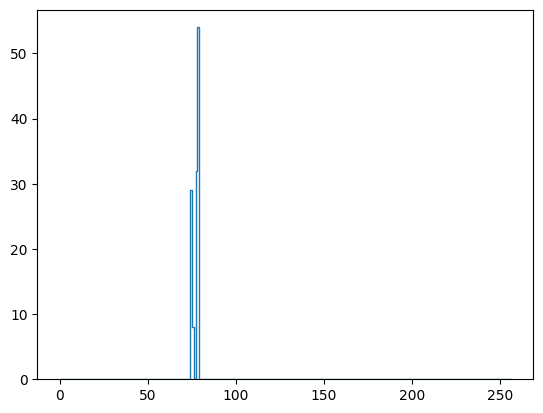

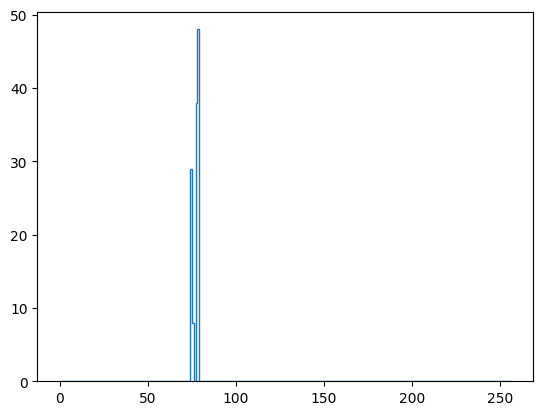

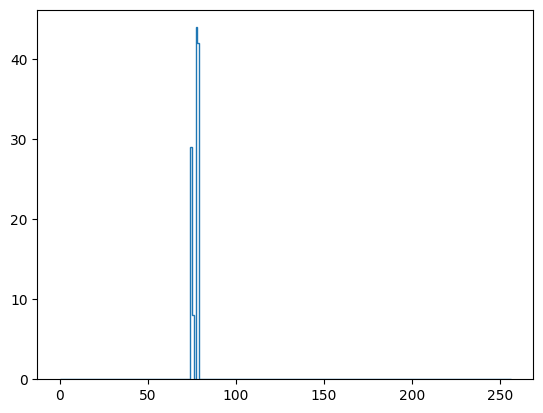

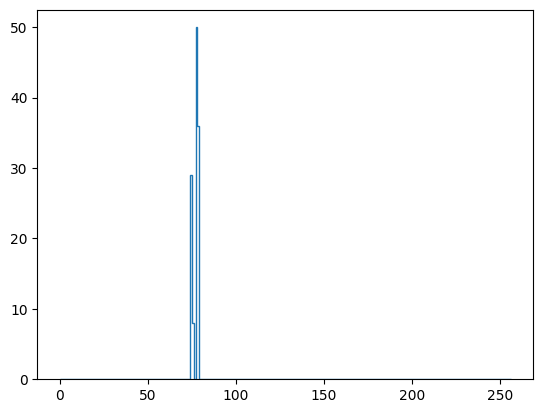

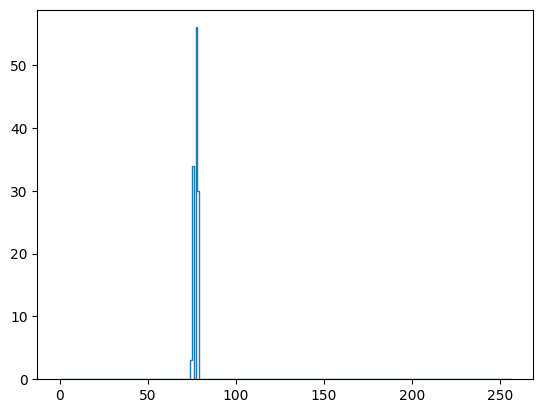

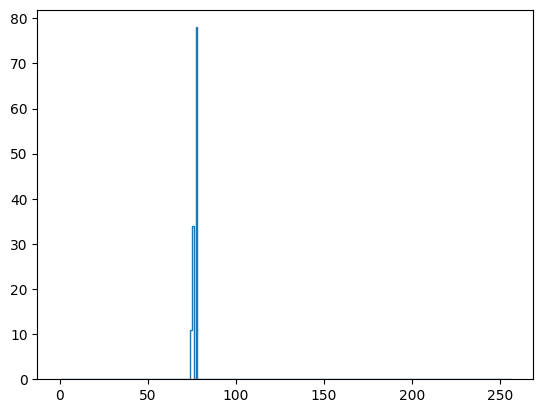

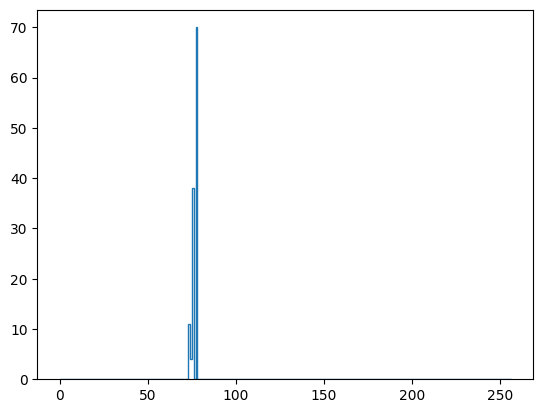

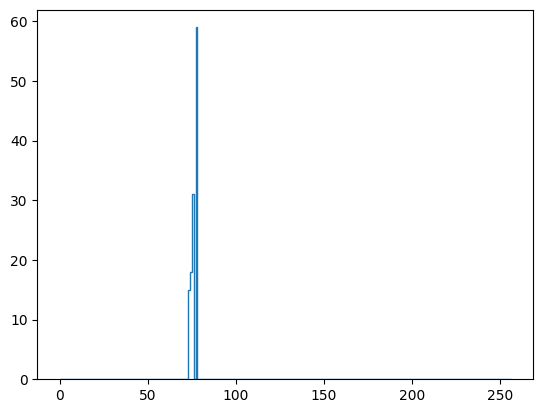

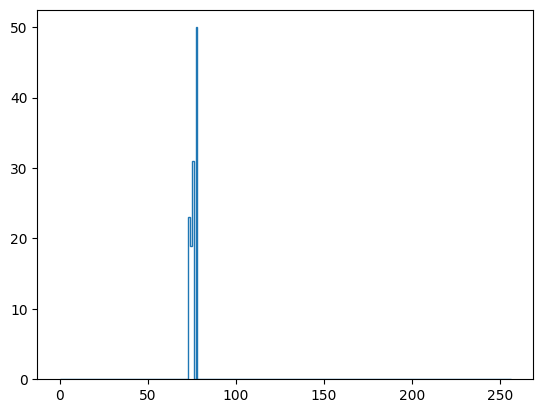

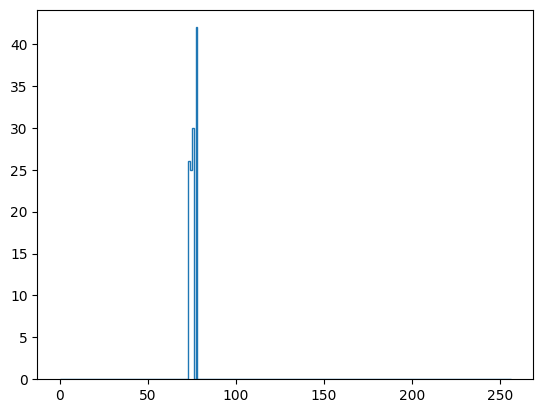

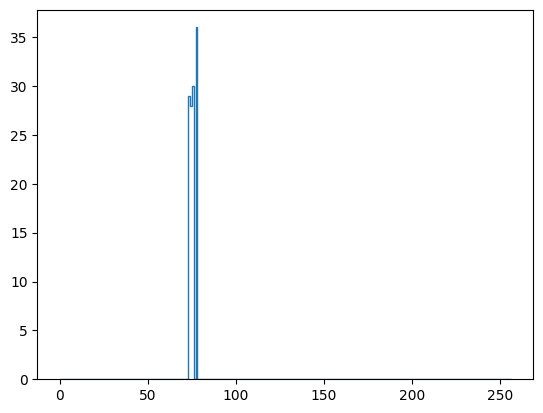

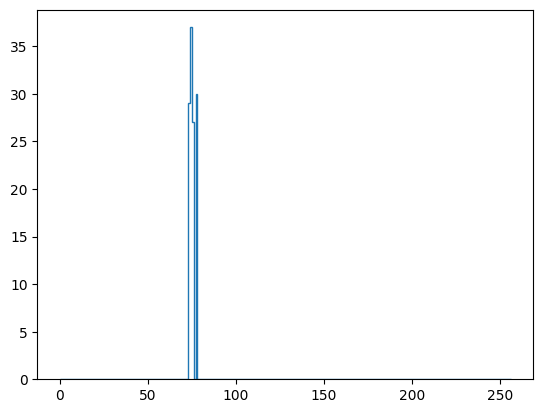

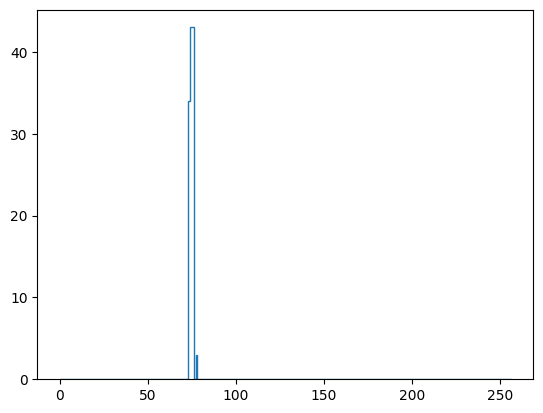

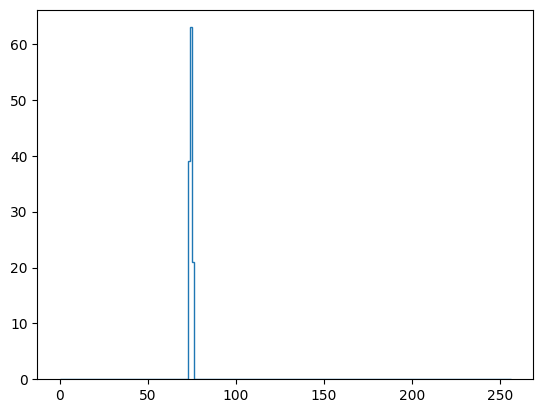

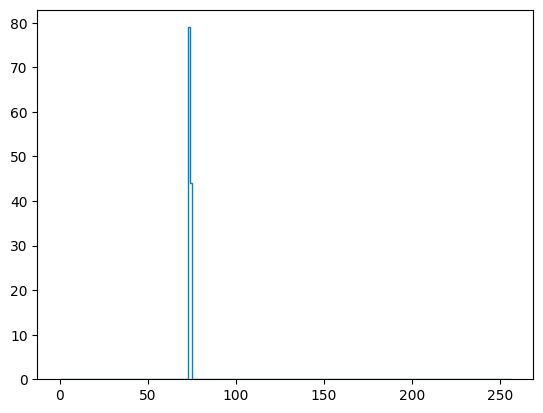

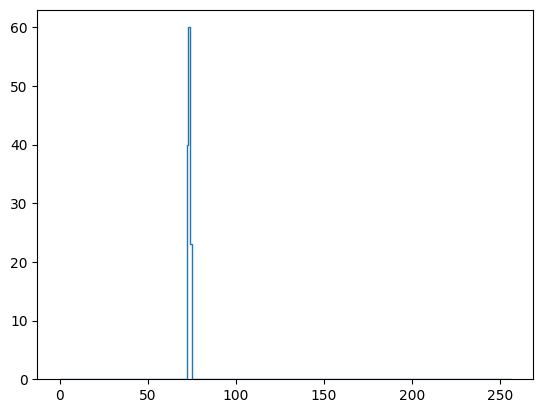

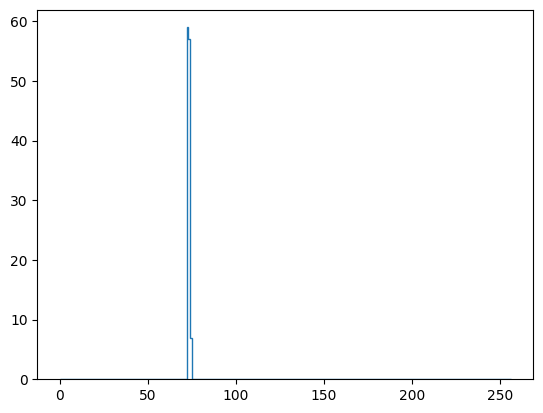

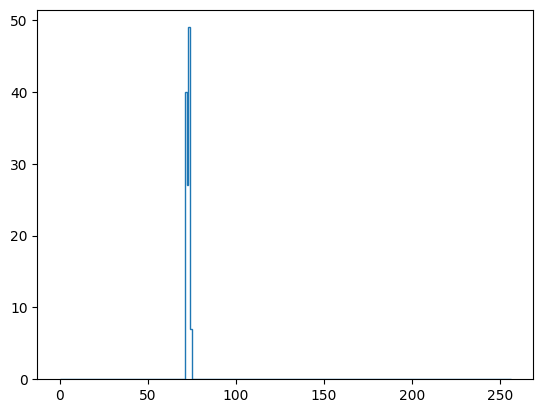

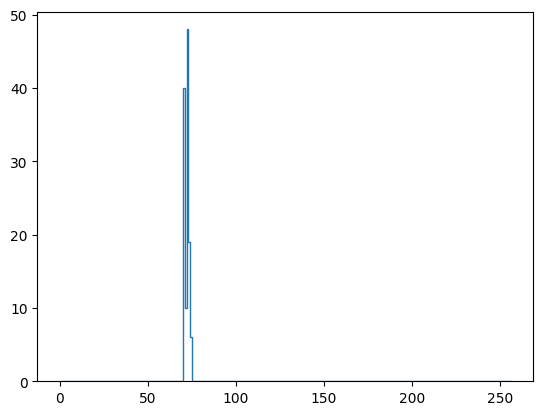

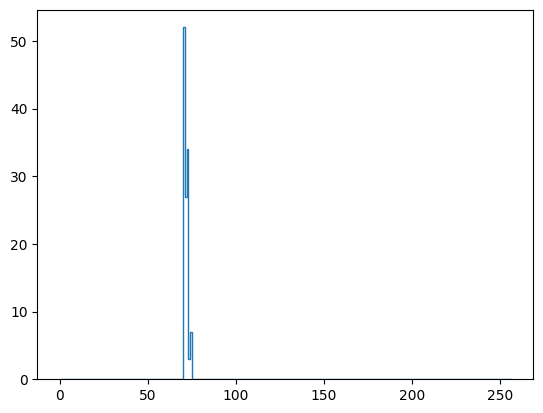

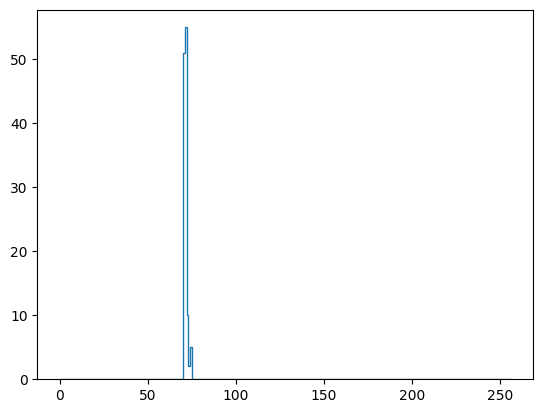

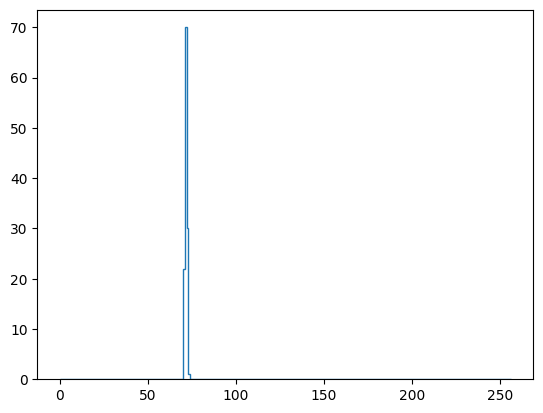

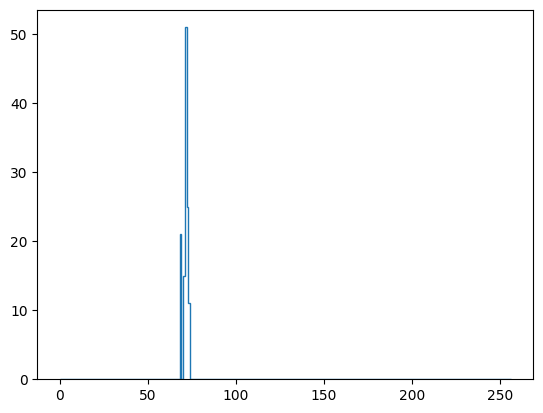

KeyboardInterrupt: 

In [64]:
plt.figure(figsize=(8,4))
for x in range(histograms.shape[0]):
    for y in range(histograms.shape[1]):
        plt.stairs(histograms[x][y][:])
        plt.show()